In [24]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df = pd.read_csv("Mall_Customers.csv")

In [26]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
df.shape

(200, 5)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
df.rename(index =str, columns ={"Annual Income (k$)": "A_Income", "Spending Score (1-100)": "Score"}, inplace =True)

In [30]:
new_data = df.drop(['CustomerID', 'Gender'], axis =1)

In [31]:
new_data.head()

,Age,A_Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [32]:
df.describe()

,CustomerID,Age,A_Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [33]:
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
A_Income      0
Score         0
dtype: int64

C:\Users\Pranav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


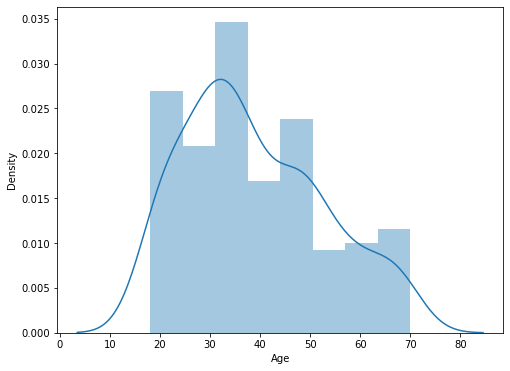

In [34]:
plt.figure(figsize =(8,6))
sns.distplot(df['Age'])
plt.xlabel('Age')
plt.show()

# KMeans with 1 Cluster

C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


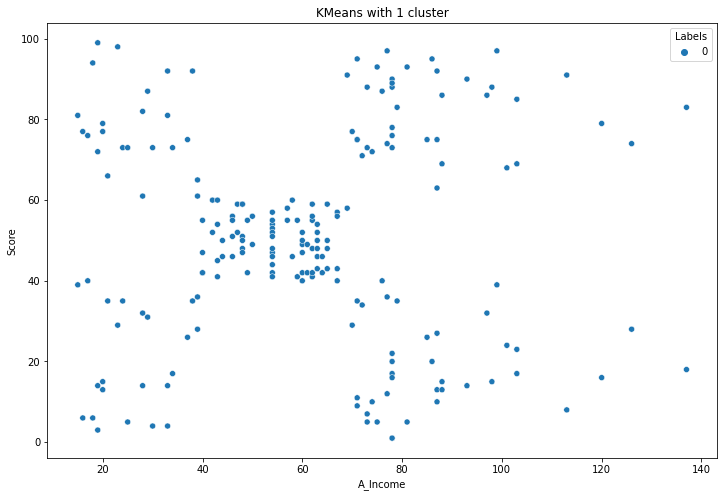

In [39]:
from sklearn.cluster import KMeans
km1 = KMeans(n_clusters =1).fit(new_data)
new_data['Labels'] = km1.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x = new_data['A_Income'], y= new_data["Score"], hue = new_data['Labels'],palette = None)
plt.title("KMeans with 1 cluster")
plt.show()

# KMeans with 3 cluster

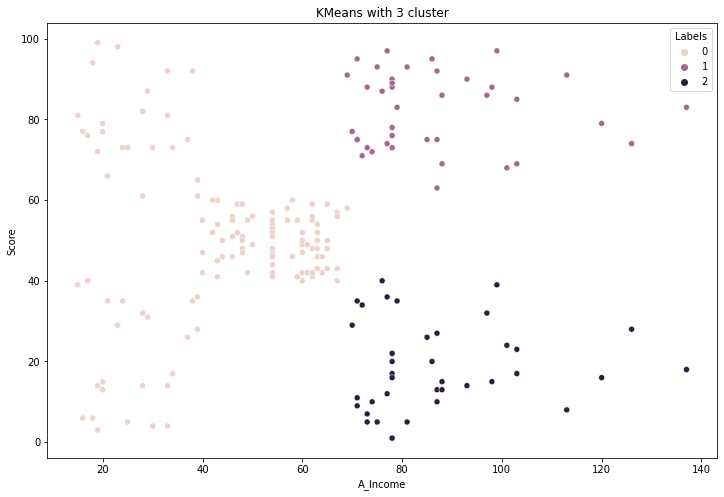

In [37]:
km3 = KMeans(n_clusters =3).fit(new_data)
new_data['Labels'] = km3.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x = new_data['A_Income'], y = new_data['Score'], hue = new_data['Labels'],palette = None)
plt.title("KMeans with 3 cluster")
plt.show()

# 

# KMeans with 5 cluster

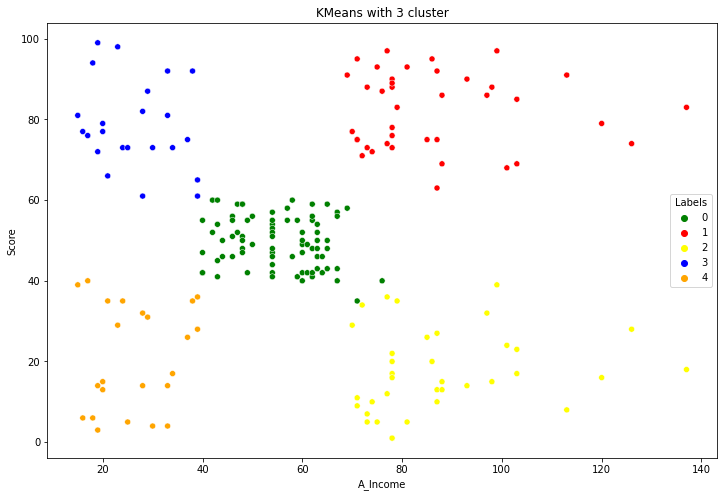

In [42]:
km5 = KMeans(n_clusters =5).fit(new_data)
new_data['Labels'] = km5.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(x = new_data['A_Income'], y = new_data['Score'], hue = new_data['Labels'],palette = ['Green', 'Red', 'Yellow', 'Blue','Orange'])
plt.title("KMeans with 3 cluster")
plt.show()

# Bar Plot of Annual Income

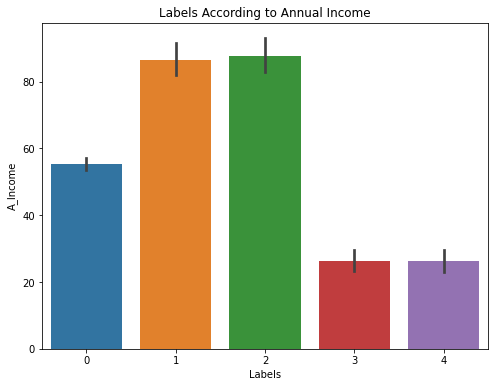

In [43]:
fig,axes = plt.subplots(figsize=(8, 6))
sns.barplot(x ='Labels', y= 'A_Income', data = new_data)
axes.set_title('Labels According to Annual Income')
plt.show()

# Bar Plot of Scoring History

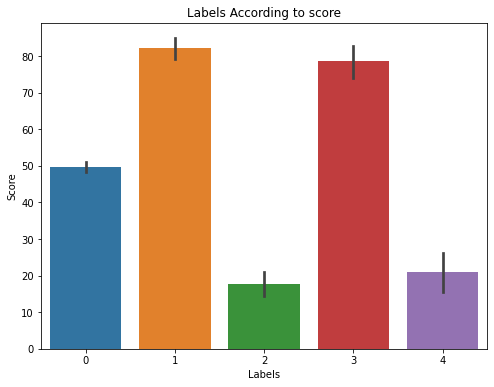

In [45]:
fig,axes = plt.subplots(figsize=(8, 6))
sns.barplot(x= 'Labels', y= 'Score', data = new_data) 
axes.set_title('Labels According to score')
plt.show()

# Clustering using KMeans

# Segmentation using Age and Spending Score

In [50]:
x1 = df[['Age', 'Score']].iloc[: , :].values
inertia =[]
for i in range(1, 11):
    algorithm = (KMeans(n_clusters= i , init ='k-means++',n_init =10, max_iter=100, tol = 0.0001, random_state =111, algorithm ='elkan'))
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)

C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(
C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


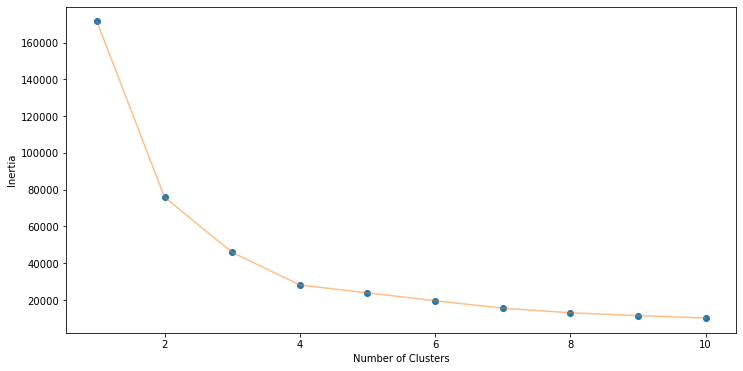

In [52]:
plt.figure(1, figsize=(12, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia,'-', alpha =0.5)
plt.xlabel('Number of Clusters')
plt.ylabel("Inertia")
plt.show()

In [53]:
x1 = df[['A_Income', 'Score']].iloc[: , :].values
inertia =[]
for i in range(1, 11):
    algorithm = (KMeans(n_clusters= i , init ='k-means++',n_init =10, max_iter=100, tol = 0.0001, random_state =111, algorithm ='elkan'))
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)

C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(
C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


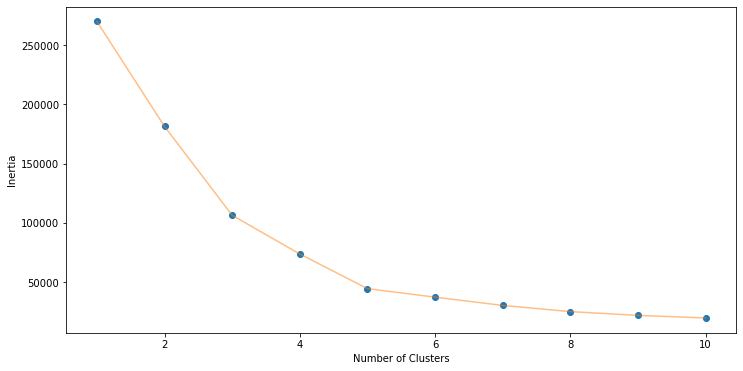

In [54]:
plt.figure(1, figsize=(12, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia,'-', alpha =0.5)
plt.xlabel('Number of Clusters')
plt.ylabel("Inertia")
plt.show()

# segmentation Using Age, Annual Income And Spending Score

In [55]:
x1 = df[['Age','A_Income', 'Score']].iloc[: , :].values
inertia =[]
for i in range(1, 11):
    algorithm = (KMeans(n_clusters= i , init ='k-means++',n_init =10, max_iter=100, tol = 0.0001, random_state =111, algorithm ='elkan'))
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_)

C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:965: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  warnings.warn(
C:\Users\Pranav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


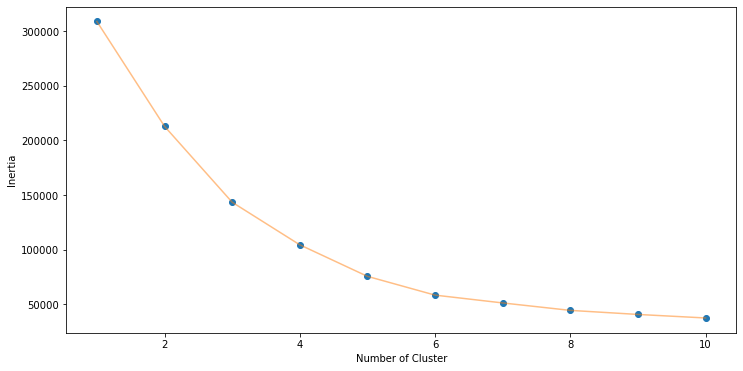

In [56]:
plt.figure(1, figsize=(12,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = 0.5)
plt.xlabel("Number of Cluster")
plt.ylabel("Inertia")
plt.show()

